# Import Data

In [1]:
#Import packages
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
imdb1 = pd.read_csv('IMDbScrapeFull.csv')
imdb2 = pd.read_csv('IMDbScrape2.csv')

In [3]:
imdbfull = pd.concat([imdb1,imdb2], axis=0)
movie = imdbfull.drop_duplicates()

In [4]:
movie

,Title,Release_Date,ViewRating,Genres,Budget,DomesticGross,WorldwideGross,Description,Keywords,Runtime
0,Dune,2021,PG-13,Action Adventure Drama Sci-Fi,"165,000,000 (estimated)","83,946,162","330,446,162",A mythic and emotionally charged hero's journe...,desert sand chosen one based on novel dune 375...,173.0
1,After We Fell,2021,R,Drama,Non,"2,170,750","21,666,463",Just as Tessa makes the biggest decision of he...,young adult based on young adult novel sequel ...,143.0
2,Cruella,2021,PG-13,Adventure Comedy Crime Drama,"100,000,000 (estimated)","86,103,234","233,274,812","Before she becomes Cruella de Vil, teenage Est...",female villain cruella de vil character live a...,161.0
3,Infinite,2021,PG-13,Action Sci-Fi Thriller,NaN,NaN,NaN,"A sci-fi, action adaption that examines the co...",reincarnation bullet dodging deflecting bullet...,124.0
4,There's Someone Inside Your House,2021,TV-MA,Horror Mystery Thriller,NaN,NaN,NaN,"Makani Young has moved from Hawaii to quiet, s...",girl slasher masked killer blood murder 15 more,123.0
...,...,...,...,...,...,...,...,...,...,...
6257,Osanazuma,1970,NaN,NaN,NaN,NaN,NaN,NaN,based on novel,60.0
6258,Tskaldidoba,1970,NaN,Drama,NaN,NaN,NaN,NaN,new life fisherman bad guy based on novel,60.0
6259,Jänken,1970,NaN,Drama,"<li class=""ipc-metadata-list__item BoxOffice__...",Non,Non,Inger gets pregnant with an American man who a...,eastern europe based on novel,60.0
6260,"Nem Amantes, Nem Amigos",1970,NaN,Drama,NaN,NaN,NaN,NaN,based on novel,60.0


# Begin Cleaning
    - Drop domestic gross profit and use worldwide gross profit
    - Clean worldwide gross profit
    - Clean budget

In [5]:
if 'DomesticGross' in movie.columns:
    
    flag = True # used in next block to ensure rerunning block doesn't throw error
    
    movie = movie.iloc[89:,:] # drop movies made in 2021 since incomplete data
    movie = movie.drop(labels = ['DomesticGross'], axis = 1) # drop domestic, worldwide is more important
    movie['WorldwideGross'] = movie['WorldwideGross'].str.replace(',','')
    movie['Budget'] = movie['Budget'].str.replace(',','')
    movie['Budget'] = movie['Budget'].str.split(' ').str[0]
    movie = movie.dropna(subset = ['WorldwideGross'], axis = 0)
    movie = movie.reset_index(drop = True)

    for i in range(movie['WorldwideGross'].shape[0]): 
        if (movie['WorldwideGross'].loc[i] == 'Non') | (movie['WorldwideGross'].loc[i][0] == '<'):
            movie = movie.drop(index = i)
        else:
            continue
            
    movie = movie.reset_index(drop = True)

            
    for i in range(movie['Budget'].shape[0]): 
        if (movie['Budget'].loc[i] == 'Non') | (movie['Budget'].loc[i][0] == '<'):
            movie = movie.drop(index = i)
        else:
            continue
            
    movie = movie.reset_index(drop = True)
    
    

movie['WorldwideGross'] = movie['WorldwideGross'].astype(int)
movie['Budget'] = movie['Budget'].astype(int)
movie

,Title,Release_Date,ViewRating,Genres,Budget,WorldwideGross,Description,Keywords,Runtime
0,The Invisible Man,2020,R,Drama Horror Mystery Sci-Fi Thriller,7000000,143151000,"The film follows Cecilia, who receives the new...",domestic abuse psychological abuse invisibilit...,124.0
1,Emma.,2020,PG,Comedy Drama Romance,10000000,26404660,Jane Austen's beloved comedy about finding you...,nineteenth century female protagonist declarat...,124.0
2,Dolittle,2020,PG,Adventure Comedy Family Fantasy,175000000,245438444,"After his wife's death, Dr. John Dolittle (Rob...",gorilla grief duck live action cgi hybrid ship...,74.0
3,The Call of the Wild,2020,PG,Adventure Drama Family,135000000,111105497,The Call of the Wild is a vibrant story of Buc...,1890s remake alaska snow dog 93 more,64.0
4,The Rhythm Section,2020,R,Action Drama Mystery Thriller,50000000,5989583,"Blake Lively stars as Stephanie Patrick, an or...",female assassin revenge terrorism female prota...,154.0
...,...,...,...,...,...,...,...,...,...
1369,Love Story,1970,PG,Drama Romance,2200000,106550690,The love story of young adults Oliver Barrett ...,love famous line baker main character dies 197...,60.0
1370,Airport,1970,G,Action Drama Thriller,10000000,100489151,"This precursor to later ""epic"" 1970s disaster ...",boeing 707 cockpit air crew airport bomb 220 m...,120.0
1371,Little Big Man,1970,PG-13,Adventure Comedy Drama Western,15000000,31559552,Jack Crabb is 121 years old as the film begins...,revisionist western based on novel cheyenne in...,120.0
1372,Beneath the Planet of the Apes,1970,G,Action Adventure Sci-Fi,3000000,18999718,"Brent is an American astronaut, part of a team...",ape planet of the apes planet astronaut rescue...,60.0


# Organizing, reshuffling, renaming etc. 

count    1374.000000
mean        2.482462
std         4.330006
min         0.000034
25%         0.378290
50%         1.287334
75%         2.822895
max        67.344471
Name: Revenue-Budget-Ratio, dtype: float64


(-1.0, 35.0)

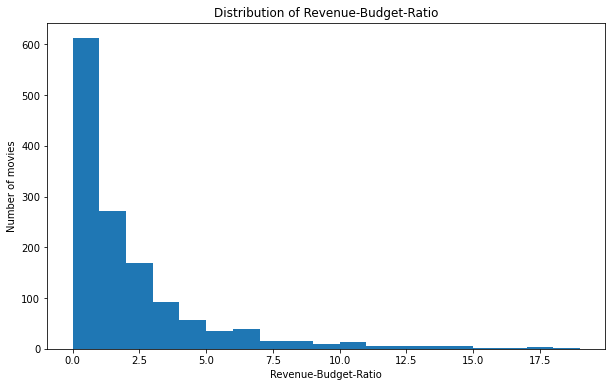

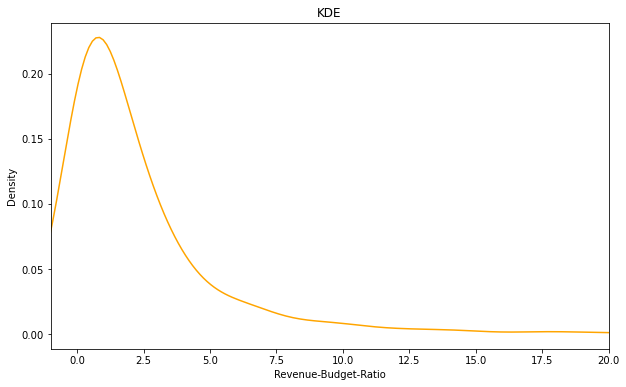

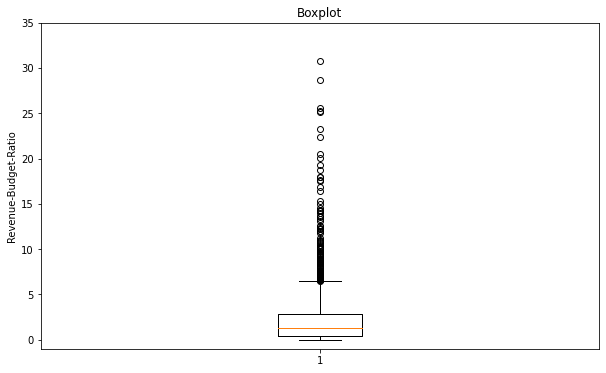

In [6]:
if flag: 
    flag = False
    movie = movie.rename(columns = {'Release_Date': 'Date','ViewRating':'Rating'})
    movie['Revenue-Budget-Ratio'] = movie['WorldwideGross'] / movie['Budget']
    movie['Date'] = movie['Date'].astype(int)
    movie['Runtime'] = movie['Runtime'].astype(int)
    
    movie['Rating'] = movie['Rating'].fillna('UNKNOWN')
    
    #enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    #movie['Rating'] = enc.fit_transform(np.array(movie['Rating']).reshape(-1,1))
    
    
# enc.categories_




# VISUALIZATION: 

print(movie['Revenue-Budget-Ratio'].describe()) # aggregate statistics

target = movie['Revenue-Budget-Ratio']
bins = np.arange(0,20,1)
plt.figure(figsize = (10,6))
plt.hist(target, bins = bins)
plt.title('Distribution of Revenue-Budget-Ratio')
plt.xlabel('Revenue-Budget-Ratio')
plt.ylabel('Number of movies')

plt.figure(figsize = (10,6))
target.plot(kind = 'kde', color = 'orange' )
plt.title('KDE')
plt.xlabel('Revenue-Budget-Ratio')
plt.xlim(-1,20)

plt.figure(figsize = (10,6))
plt.boxplot(target)
plt.title('Boxplot')
plt.ylabel('Revenue-Budget-Ratio')
plt.ylim(-1,35)


# Distribution is clearly exponential or poisson

In [10]:
movie.isna().sum()

Title                   0
Date                    0
Rating                  0
Genres                  0
Budget                  0
WorldwideGross          0
Description             8
Keywords                0
Runtime                 0
Revenue-Budget-Ratio    0
dtype: int64